# Your Data Story Title

Student names: Reyna Geluk (15708845),
Lucas Vaneman (14663937),
Aryan Müller (15631591),
Mieke Fraters (15778770)   

Team number: C3 (#9)

In [1]:
# Load image from link
url = 'https://cdn.cbs.nl/images/6d6937674277573235627978534b49652b6e323757513d3d/900x450.jpg'

# Display image from URL with smaller size and subtitle
from IPython.display import Image, display

# Set the desired image width and height
width = 600
height = 300

# Set the subtitle text
subtitle = "© Hollandse Hoogte / Peter Hilz"

# Create an Image instance with the URL
image = Image(url=url, width=width, height=height)

# Display the image and subtitle
display(image)
print(subtitle)

© Hollandse Hoogte / Peter Hilz


## Introductie

### De topic, perspectieven en argumenten     

## Onderwerp

Het geluksniveau van mensen wordt beïnvloed door een combinatie van vele factoren. In deze data-analyse onderzoeken we of en hoe weersomstandigheden en klimaatfactoren samenhangen met het gemiddelde geluk van mensen in verschillende landen. 

Klimaatfactoren kunnen de leefbaarheid van een land beïnvloeden (1, 2, 3). Zo kan extreem weer, zoals langdurige kou, hittegolven of hoge neerslag, mogelijk leiden tot meer stress, gezondheidsproblemen of economische schade (1,2). Anderzijds zijn er ook landen met minder aangename klimaten waar het geluksniveau toch hoog blijft, vaak dankzij sterke sociale vangnetten en economische stabiliteit.

Naast klimatologische factoren spelen ook sociale vangnetten en instituties een belangrijke rol in het verklaren van het geluksniveau in een land. Landen met goed ontwikkelde sociale structuren bieden vaak meer inkomenszekerheid, toegankelijke gezondheidszorg, goed onderwijs en sterke sociale cohesie. Deze factoren helpen burgers om beter om te gaan met tegenslagen, werkloosheid, ziekte of ouderdom, waardoor het algehele welzijn hoger blijft, zelfs bij ongunstige klimaatomstandigheden.

Het World Happiness Report (4) benadrukt dat aspecten zoals sociale steun, vrijheid van keuzes, lage corruptieniveaus en sterke instituties sterk bijdragen aan het gemiddelde geluk in landen. Hierdoor kunnen landen met een relatief streng klimaat, zoals Scandinavië, toch hoog scoren op de wereldwijde gelukslijsten.

In deze studie proberen we inzicht te krijgen in de relatie tussen klimaat, sociaal-economische factoren en geluk. We baseren ons hierbij onder andere op eerder wetenschappelijk onderzoek dat suggereert dat zowel omgevingsfactoren als maatschappelijke structuren een rol spelen bij het ervaren van geluk.

### Weersomstandigheden en klimaatfactoren die we onderzoeken:
- Gemiddelde temperatuur
- Zonuren
- Air quality index
- Hoeveelheid natural disasters
- Bewolktheid


### Sociaal-economische indicatoren die we onderzoeken:
- GDP per capita
- Sociale steun
- Vrijheid
- Corruptieperceptie
- Gezondheidszorg

## Perspectieven en argumenten

### Perspectief 1: Klimaat heeft een significante invloed op geluk
- **Argument 1.1**: In landen met een stabiel, mild of zonnig klimaat zijn mensen gemiddeld blijer, omdat dergelijke omstandigheden bijdragen aan een prettigere leefomgeving.
- **Argument 1.2**: Extreme weersomstandigheden (hittegolven, kou, neerslag) zorgen voor stress en gezondheidsproblemen, wat het geluksniveau verlaagt.

### Perspectief 2: Sociaal-economische factoren zijn bepalender voor geluk dan klimaat
- **Argument 2.1**: Landen als Zweden, Noorwegen en Finland hebben lange, koude winters en lage gemiddelde temperaturen, maar behoren tot de gelukkigste landen dankzij sterke sociale vangnetten, gezondheidszorg en welvaart.
- **Argument 2.2**: Economische stabiliteit, werkgelegenheid, gezondheidszorg en sociale verbondenheid dragen meer bij aan geluk dan het klimaat op zich.

Met behulp van de beschikbare datasets proberen we deze perspectieven te toetsen aan de hand van concrete data en visualisaties.

## Bronnen
[1] https://journals.ametsoc.org/configurable/content/journals$002fwcas$002f5$002f1$002fwcas-d-11-00052_1.xml?t:ac=journals%24002fwcas%24002f5%24002f1%24002fwcas-d-11-00052_1.xml  
[2] https://www.sciencedirect.com/science/article/pii/S0921800904002940?casa_token=BVWwnTlWUl8AAAAA:swoTcNB_MJhQproOQsGzi-0ZwV3kB9f008xfHFEcJth19-N9_7H070ksne72pB9LM4kdC_jIhwA  
[3] https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0153638
[4] https://worldhappiness.report/ed/2017/

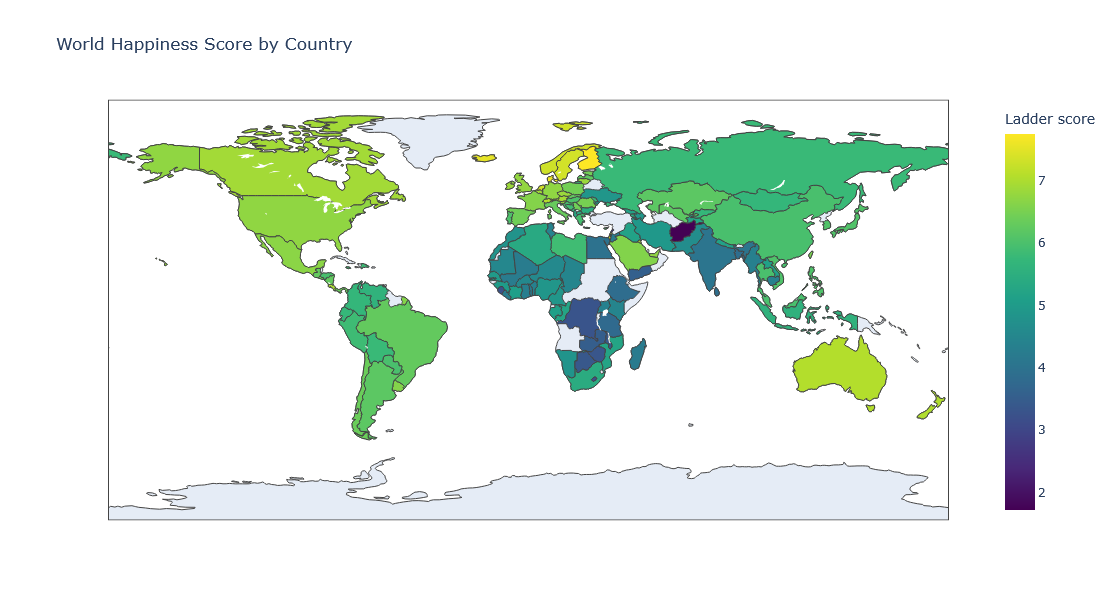

In [80]:
df1 = pd.read_csv("World-happiness-report-2024.csv") 
happymap = px.choropleth(
    df1,
    locations='Country name',               # Country names
    locationmode='country names',      # Use full country names
    color='Ladder score',           # Color by score
    color_continuous_scale='Viridis',  # 
    title='World Happiness Score by Country',
    labels={'Happiness Score': 'Ladder score'}
)
happymap.update_layout(
    width=1000,        # Width in pixels
    height=600         # Height in pixels
)

happymap.show()

## Dataset and Preprocessing

In [17]:
# Alle imports
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import numpy as np
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


# Datasets importen
df1 = pd.read_csv('World-happiness-report-2024.csv') # De happiness dataset, neem deze en NIET de ander! https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated
df2 = pd.read_csv('GlobalWeatherRepository.csv')     # Main weather dataset, https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository
df3 = pd.read_csv('update_temperature.csv')          # Deze bevat ook de variabele voor natuurrampen, https://www.kaggle.com/datasets/adilshamim8/temperature

df2['last_updated'] = pd.to_datetime(df2['last_updated'])
df22024 = df2[df2['last_updated'].dt.year == 2024]  # Zo is de tabel gefilterd op values uit 2024

def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan   # Vanwege een error met de mode krijgen van series
    
df2w = df22024.groupby('country').agg({
    'location_name': mode,
    'temperature_celsius' : 'mean',
    'feels_like_celsius' : 'mean',
    'condition_text': mode,
    'wind_kph' : 'mean',
    'sunrise': mode,                      # dit gaan we ook nog veranderen naar een column voor de hoeveelheid uren daglicht. Kijk dus niet naar 
    'sunset' : mode,                      # deze column maar naar de Sunlight hours column. Kan zijn dat r misschien problemen komen met negatieve waarden btw.
    'air_quality_Carbon_Monoxide' : 'mean',
    'air_quality_Ozone' : 'mean',
    'air_quality_Nitrogen_dioxide' : 'mean',
    'air_quality_Sulphur_dioxide' : 'mean',
    'air_quality_PM2.5' : 'mean',
    'air_quality_PM10' : 'mean',
    'air_quality_gb-defra-index' : 'mean',         # Nog niet finalized, we gebruiken waarschijnlijk andere variabelen voor air quality, ff kijken wekle
    'air_quality_us-epa-index' : 'mean'
}).reset_index()

df2w['sunrise'] = pd.to_datetime(df2w['sunrise'], format='%I:%M %p')
df2w['sunset'] = pd.to_datetime(df2w['sunset'], format='%I:%M %p')
df2w['Sunlight hours'] = ((df2w['sunset'] - df2w['sunrise']).dt.total_seconds() / 3600).round(2)

df32024 = df3[df3['Year'] == 2024].copy()         # .copy() want anders verschijnt een warning, 
df32024.rename(columns={'Country' : 'country'}, inplace=True)
df23 = df2w.merge(df32024[['country', 'Extreme_Weather_Events']], on='country', how='left')  # merge van df2 en df3

df1filter = df1[['Country name', 'Ladder score', 'Log GDP per capita',                           # df1 filteren op wat we willen gebruiken
                 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 
                 'Generosity', 'Perceptions of corruption', 'Dystopia + residual']].copy()

df1filter.rename(columns={'Country name' : 'country'}, inplace= True)
df123 = df23.merge(df1filter, on='country', how='left')   # De tabel! We kunnen nog ff kiezen welke waarden wel/niet nodig zijn.

df123

,country,location_name,temperature_celsius,feels_like_celsius,condition_text,wind_kph,sunrise,sunset,air_quality_Carbon_Monoxide,air_quality_Ozone,...,Sunlight hours,Extreme_Weather_Events,Ladder score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Afghanistan,Kabul,22.696943,21.810044,Sunny,12.113974,1900-01-01 04:40:00,1900-01-01 19:10:00,774.743013,107.629258,...,14.50,NaN,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672
1,Albania,Tirana,25.022271,25.559389,Sunny,11.429694,1900-01-01 05:07:00,1900-01-01 16:11:00,257.638646,83.346288,...,11.07,NaN,5.304,1.438,0.924,0.638,0.690,0.138,0.049,1.428
2,Algeria,Algiers,25.154386,26.760526,Partly cloudy,15.312719,1900-01-01 05:29:00,1900-01-01 17:32:00,307.305263,88.343860,...,12.05,NaN,5.364,1.324,1.191,0.568,0.247,0.091,0.200,1.743
3,Andorra,Andorra La Vella,14.105677,13.451528,Sunny,9.516594,1900-01-01 06:16:00,1900-01-01 17:21:00,177.131659,64.942358,...,11.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,Luanda,26.335808,29.028384,Partly cloudy,13.153712,1900-01-01 06:23:00,1900-01-01 18:02:00,690.936900,117.070306,...,11.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Гватемала,New Guatemala,15.900000,15.900000,Mist,6.500000,1900-01-01 05:41:00,1900-01-01 18:35:00,607.500000,2.200000,...,12.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,Польша,Beirut,24.200000,25.500000,Cloudy,13.700000,1900-01-01 04:50:00,1900-01-01 21:00:00,176.900000,86.600000,...,16.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,Турция,Yaren,34.000000,34.200000,Partly cloudy,24.100000,1900-01-01 05:54:00,1900-01-01 20:37:00,205.300000,123.000000,...,14.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,كولومبيا,Costa Rica,23.100000,25.500000,Mist,6.500000,1900-01-01 05:23:00,1900-01-01 18:02:00,205.300000,4.400000,...,12.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Your First Perspective

### The First Argument of Your First Perspective

Uitleggen hoe en wat en also de code laten zien


> *Figure 1: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

At solmen va esser necessi far uniform grammatica, pronunciation e plu sommun paroles. Ma quande lingues coalesce, li grammatica del resultant lingue es plu simplic e regulari quam ti del coalescent lingues. Li nov lingua franca va esser plu simplic e regulari quam li existent Europan lingues. Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante.

In [9]:
import plotly.graph_objects as go
import pandas as pd

# Read the data from table2.csv
df2 = pd.read_csv('table2.csv')

# Initialize a figure
fig2 = go.Figure()

# Create the first line
fig2.add_trace(
    go.Scatter(
        x=df2["Jaartal"], 
        y=df2["Workers involved (x 1,000)"],
        mode='lines+markers',
        line=dict(color='#00a1cd', width=2),
        marker=dict(color='#00a1cd', size=5),
        name="Workers involved",
        hovertemplate='<b>%{x}</b><br>Workers involved: <b>%{y} thousand</b> <extra></extra>'
    )
)

# Create the second line
fig2.add_trace(
    go.Scatter(
        x=df2["Jaartal"], 
        y=df2["Working days lost (x 1,000)"],
        mode='lines+markers',
        line=dict(color='#0058b8', width=2),
        marker=dict(color='#0058b8', size=5),
        name="Working days lost",
        hovertemplate='<b>%{x}</b><br>Working days lost: <b>%{y} thousand</b> <extra></extra>'
    )
)

# Customize the plot layout
fig2.update_layout(
    plot_bgcolor='white',
    xaxis=dict(title='Years'),
    yaxis=dict(title=''),  # Remove y-axis tick labels
    legend=dict(title='', orientation='h', yanchor='bottom', y=-0.3, xanchor='right', x=0.3),  # Update legend settings
    title="Number of workers involved and working<br>days lost during strikes (in thousand)",
    height=500
)

# Add horizontal lines at y = 0, 100, 200, 300, 400, and 500
y_values = [0, 100, 200, 300, 400, 500]
for y in y_values:
    fig2.add_shape(
        type='line',
        x0=min(df2['Jaartal']),
        x1=max(df2['Jaartal']),
        y0=y,
        y1=y,
        line=dict(color='black'),
        line_width=0.5
    )

# Show the plot
fig2.show()

> *Figure 2: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

### Argument 1.2: Extreme weersomstandigheden (hittegolven, kou, neerslag) zorgen voor stress en gezondheidsproblemen, wat het geluksniveau verlaagt.

> *Figure 3: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

## Your Second Perspective

Maar niet alleen het klimaat heeft invloed op je gevoel. Zoals te zien in de figuur X, scoren de Scandinavische landen hoge Happiness scores in vergelijking met andere landen die vaak minder extreme weersomstandigheden hebben. Andere factoren, zoals GDP per capita (BBP per hoofd) en vrijheid, hebben ook invloed op de blijheid van mensen in een bepaald land. Dit komt doordat deze factoren vaak extra betekenis hebben, vrijheid geeft meer ruimte voor men om zichzelf te uiten en een hoger GDP per capita betekent dat individuen in een land vaak meer te besteden hebben. 

Daarom wordt er gekeken naar de volgende twee argumenten. Ten eerste, dat de Scandinavische landen met extremere weersomstandigheden toch hoge Happiness scores hebben vanwege hun sterke sociale factoren. Ten tweede hebben landen met over het algemeen hogere GDP per capita en een mindere perceptie van corruptie hogere Happiness scores. Hieronder zal er meer worden gezegd over de twee argumenten. 

### The First Argument of Your Second Perspective

Uit de figuur hieronder kunnen we zien dat er een positieve correlatie is tussen Social support en de Happiness score in verschillende landen. Landen met een betere sociale steun, hebben ook vaker een hogere Happiness score. Hieruit valt vooral op dat landen die boven op die lijst staan, vooral de Scandinavische landen zijn (Zweden, Noorwegen, Finland, Ijsland en Denemarken). Als we hierin dus kijken naar landen met een mildere klimaat (tussen de 16 en 23 graden), en de Scandinavische landen, zien we dat deze landen nog steeds, ondanks redelijke hoge scores in Social support en een veel mildere klimaat, toch lager scoren dan de Scandinavische landen. Dit komt zeker niet alleen door Social support en klimaat, maar de Scandinavische landen scoren over het algemeen veel hoger op alle factoren dan andere landen. 

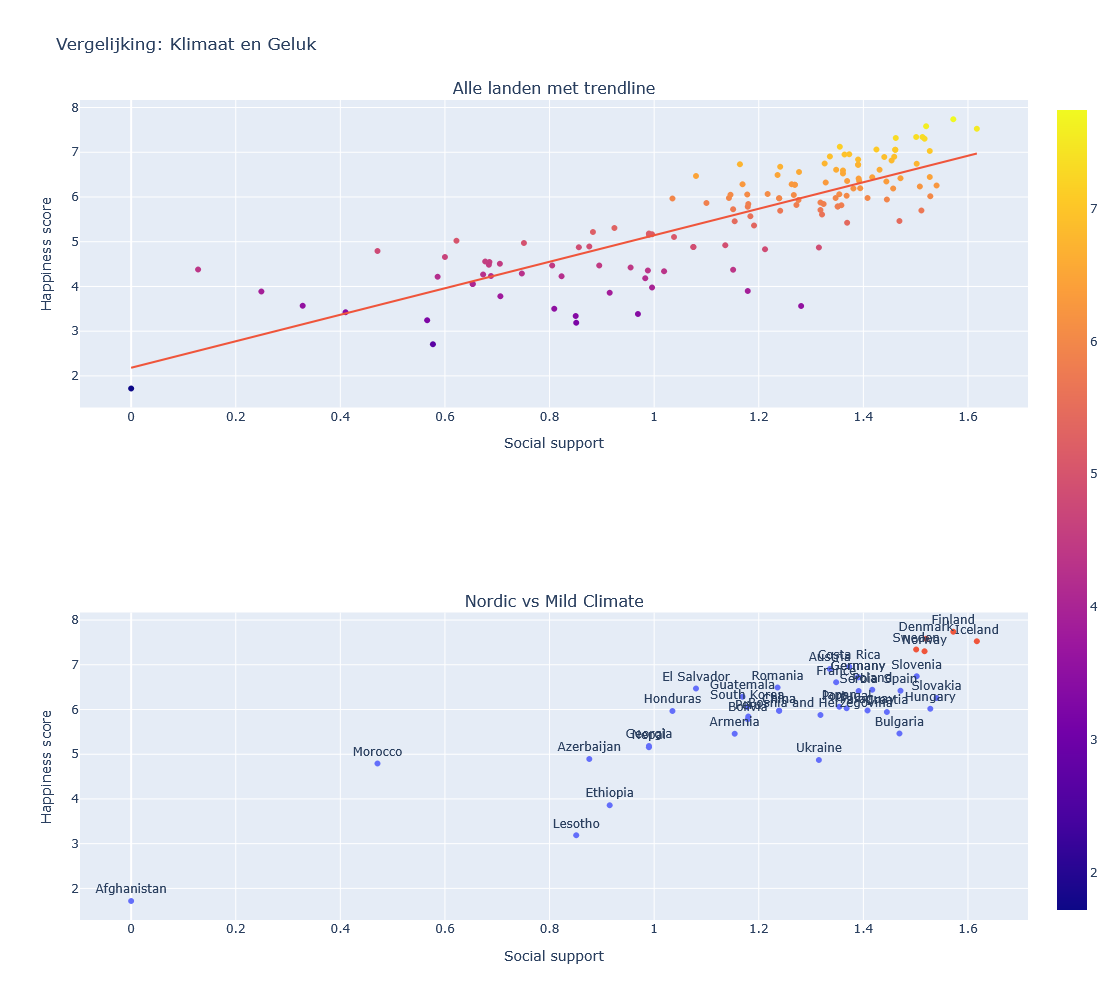

In [220]:
# Definieer Nordic en gemiddeld warme landen
nordics = ['Sweden', 'Norway', 'Finland', 'Denmark', 'Iceland']
# Stel gemiddelde temperatuurgrens in
avg_temp_df = df123[(df123['temperature_celsius'] >= 16) & (df123['temperature_celsius'] <= 23)]
avg_temp_countries = avg_temp_df['country'].unique()

# Categoriseer landen in Highlight kolom
def climate_category(row):
    if row['country'] in nordics:
        return 'Nordic'
    elif row['country'] in avg_temp_countries:
        return 'Mild Climate'
    else:
        return 'Other'

df123['Highlight'] = df123.apply(climate_category, axis=1)

# Eerste plot, Correlatie over alle landen met trendline
corr_all = px.scatter(
    df123,
    x='Social support',
    y='Ladder score',
    color='Ladder score',
    color_continuous_scale='Viridis',
    trendline='ols',
    title='Correlatie: Social Support vs Happiness (alle landen)',
    hover_name='country',
)
corr_all.update_layout(showlegend=False)

# Tweede plot, Highlight Nordic vs Mild Climate
scan_vs_mild = px.scatter(
    df123[df123['Highlight'].isin(['Nordic', 'Mild Climate'])],
    x='Social support',
    y='Ladder score',
    text='country',
    color='Highlight',
    color_continuous_scale='Viridis',
    hover_name='country',
    title='Nordic vs Mild Climate landen: Social Support vs Happiness',
    
)
scan_vs_mild.update_layout(showlegend=False)
# Combineer de twee plots in subplots
final_fig = make_subplots(rows=2, cols=1, subplot_titles=("Alle landen met trendline", "Nordic vs Mild Climate"))

# Voeg eerste plot toe
for trace in corr_all.data:
    final_fig.add_trace(trace, row=1, col=1)
# Voeg tweede plot toe
for trace in scan_vs_mild.data:
    final_fig.add_trace(trace, row=2, col=1)
# Layout aanpassen
final_fig.update_layout(height=1000, width=1000, title_text="Vergelijking: Klimaat en Geluk")
final_fig.update_yaxes(title_text="Happiness score", row=1, col=1)
final_fig.update_yaxes(title_text="Happiness score", row=2, col=1)
final_fig.update_xaxes(title_text="Social support")
final_fig.update_layout(showlegend=False)
final_fig.update_traces(textposition='top center')
# Laat figuur zien
final_fig.show()

> *Figuur X, hierop is te zien dat landen met meer Social support, ook blijer zijn over het algemeen. Daarnaast is te zien dat het temperatuur verschil hier ook niet uitmaakt en landen met betere sociale steun toch hoger scoren.* 

### The Second Argument of Your Second Perspective

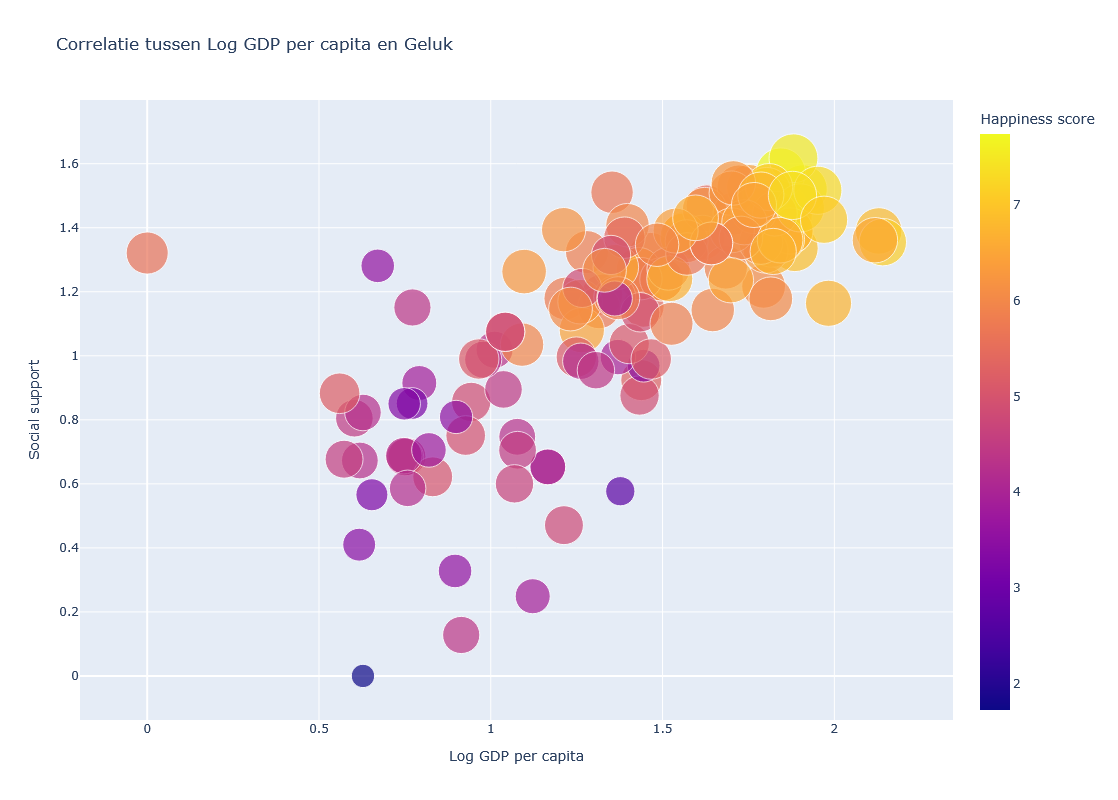

In [101]:
df123_clean = df123.dropna(subset=['Log GDP per capita', 'Ladder score', 'Social support'])
bubble = px.scatter(
    df123_clean,
    x='Log GDP per capita',
    y='Social support',
    size='Ladder score',       # bubble-grootte
    color='Ladder score',      # optioneel: zelfde variabele of kies bv. 'Generosity'
    hover_name='country',        # laat landen zien bij hover
    size_max=35,                 # maximale bubble-grootte
    height=800,
    width=1000,
    title='Correlatie tussen Log GDP per capita en Geluk',
    labels={
        'Log GDP per capita': 'Log GDP per capita',
        'Ladder score': 'Happiness score',
        'Social support': 'Social support'
    }
)
bubble.show()

> *Figuur X*

> *Figuur x*

## Reflection

Gewoon ff uitschrijven wat voor een feedback we hebben gekregen van elkaar en van de TAs enzo

- Bij correlatie van extreme weather en ladder score waren er maar 17 landen in de dataset. Niet heel veel landen = minder betrouwbaar dus misschien is die correlatie toch wat anders als we betere data konden vinden (de enige dataset die ik verder vond was nog minder landen). Basically next time wat langer doorzoeken misschien naar een dataset die wel wat betrouwbaarder is

## Work Distribution

Curabitur non lacus ex. Maecenas at massa ultricies justo venenatis condimentum sed et eros. Ut vitae iaculis massa. Aenean vitae sagittis nibh. Aliquam pharetra dui suscipit purus dictum rutrum. Donec ultricies odio quis porttitor aliquet. Fusce sed nisl non velit rutrum commodo nec sed magna. Morbi non volutpat mi, cursus pulvinar dolor.

Nam sit amet volutpat sapien. Aenean eu mattis neque. Maecenas eget libero consequat, condimentum nulla luctus, fermentum lectus. Donec at enim sit amet dolor vestibulum faucibus. Vestibulum velit elit, faucibus ut mi sit amet, mollis rutrum eros. Ut ut lacinia ante, eu placerat ligula. Fusce quis convallis purus. Maecenas eget fringilla quam.

Proin ac sapien et lectus tempor dignissim a at arcu. Donec placerat aliquet odio, vel aliquam nibh tempus vel. Pellentesque non velit iaculis, porta metus sed, dictum augue. Aenean tempus gravida ullamcorper. Proin cursus fringilla turpis. Integer id lectus dignissim, ultrices metus vel, dictum quam. Suspendisse augue ligula, vestibulum ac nulla a, porta pharetra leo. Integer et pharetra lacus, in porttitor mauris. Cras sodales metus sit amet enim rhoncus sodales. Etiam orci enim, tincidunt eget arcu vel, gravida scelerisque lacus.

## References


* Helliwell, J. F., Layard, R., Sachs, J. D., De Neve, J.-E., Aknin, L. B., & Wang, S. (Eds.). (2024). World Happiness Report 2024. University of Oxford: Wellbeing Research Centre.  
* Nidula Elgiriyewithana. (2025). World Weather Repository ( Daily Updating ) [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/12171408  



## Appendix

Generative AI (ChatGPT with GPT 3.5) is used to facilitate the creation of this document, as shown in the table below.

| Reasons of Usage | In which parts? | Which prompts were used? |
| ------------------------ | --------------------------------- | -------------------------------------------- |
| Brainstorm research questions and identify keywords for further search | The entire project framing | "Give keywords about the current debate in climate change with brief explanations" |
| Improve writing clarity and enhance readability | All sections | "Edit the following text to make it more clear. Do not alter the meaning." |
| Enhance readability | All sections | "Revise the paragraph to improve readability." |
| Ensure grammatical accuracy |  All sections | "Correct any grammatical errors in the text." |
| Provide alternative phrasing | Descriptions of the perspectives | "Suggest alternative phrases for better clarity." |
| Optimize sentence structure | All sections | "Restructure the sentence for better flow." |
| Condense lengthy sentences | All sections | "Simplify the following sentences without losing important information."|

> *Table 1: Usage of generative AI to facilitate the creation of this document.*